In [1]:
import jax
jax.config.update("jax_enable_x64", True)

import h5py
import numpy as np
import scipy.optimize
import jax.numpy as jnp
import fitsio
from scipy.stats import gaussian_kde

import proplot as pplt

In [2]:
d = fitsio.read("/Users/beckermr/Desktop/input_cosmos_v4_montara_simcat_v7_seed42.fits")

In [3]:
d.shape

(223007,)

In [4]:
from des_y6_nz_modeling import ZVALS

In [5]:
z_be = np.concatenate([[0.0, 0.01], ZVALS[1:]+0.025])

In [6]:
z_be

array([0.  , 0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36, 0.41, 0.46,
       0.51, 0.56, 0.61, 0.66, 0.71, 0.76, 0.81, 0.86, 0.91, 0.96, 1.01,
       1.06, 1.11, 1.16, 1.21, 1.26, 1.31, 1.36, 1.41, 1.46, 1.51, 1.56,
       1.61, 1.66, 1.71, 1.76, 1.81, 1.86, 1.91, 1.96, 2.01, 2.06, 2.11,
       2.16, 2.21, 2.26, 2.31, 2.36, 2.41, 2.46, 2.51, 2.56, 2.61, 2.66,
       2.71, 2.76, 2.81, 2.86, 2.91, 2.96, 3.01])

<a list of 1 Line2D objects>

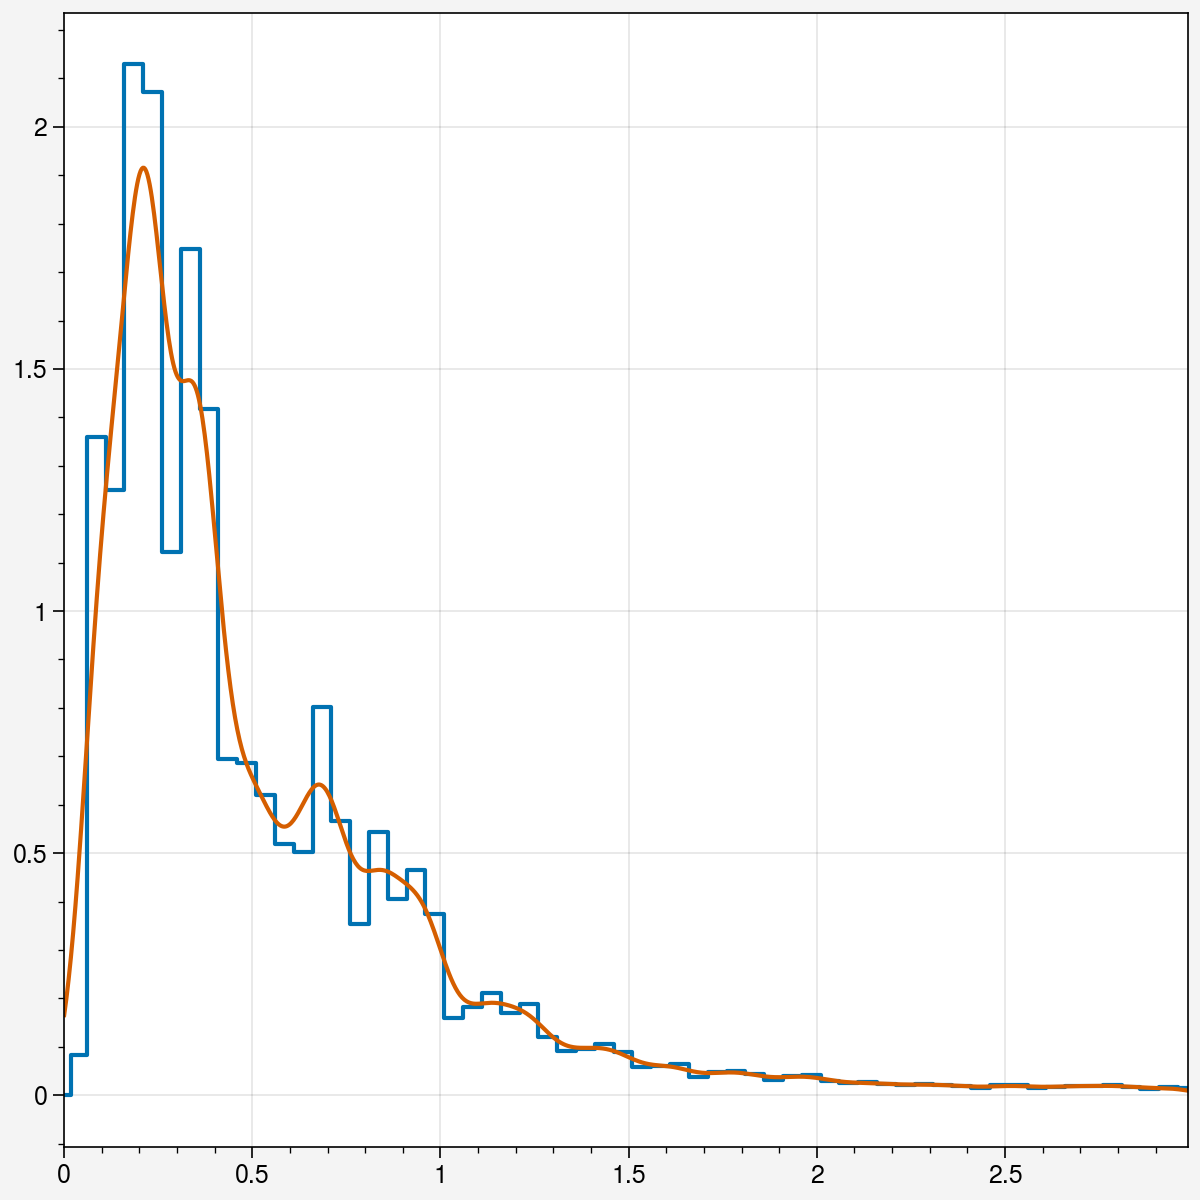

In [7]:
wgt = d["flux_r"] + d["flux_i"] + d["flux_z"]

msk = d["photoz"] <= 3.0

kde = gaussian_kde(
    d["photoz"][msk],
    weights=wgt[msk],
    bw_method=0.1,
)

fig, axs = pplt.subplots(figsize=(6, 6))

ax = axs[0, 0]

h, be = np.histogram(
    d["photoz"],
    bins=z_be,
    density=False,
    weights=wgt,
)    
h[0] = 0.0
dx = z_be[1:] - z_be[:-1]
h = h / dx
h = h / np.sum(h * dx)
assert np.allclose(np.sum(h * dx), 1.0)
assert h.shape == ZVALS.shape

ax.plot(ZVALS, h, drawstyle="steps-mid")

zv = np.linspace(0, ZVALS[-1], 1000)
kde_vals = kde.evaluate(zv)
ax.plot(zv, kde_vals)


In [8]:
fitsio.write("gtemplate_hist_input_cosmos_v4_montara_simcat_v7_seed42.fits", h, clobber=True)

In [9]:
h

array([0.        , 0.08246582, 1.3601444 , 1.25066374, 2.12958718,
       2.07238116, 1.12181115, 1.74694677, 1.41628421, 0.69532465,
       0.685951  , 0.61997625, 0.51828428, 0.50239732, 0.80093222,
       0.56618465, 0.35469994, 0.54471916, 0.40586034, 0.46442509,
       0.37345465, 0.15910531, 0.1814102 , 0.21069403, 0.16936997,
       0.18921011, 0.12080918, 0.09110721, 0.09599979, 0.1051503 ,
       0.08837551, 0.05902462, 0.05996257, 0.06431205, 0.0379474 ,
       0.04820887, 0.04965505, 0.0430462 , 0.03193403, 0.04069588,
       0.04148511, 0.02938825, 0.02468001, 0.02701437, 0.02319899,
       0.02105647, 0.02256154, 0.02151391, 0.01996838, 0.01486944,
       0.02031702, 0.02035628, 0.01602842, 0.01748957, 0.01953005,
       0.01923483, 0.02052126, 0.01762587, 0.01375706, 0.01627206,
       0.01461884])